In [33]:
import glob
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import math, random
from helpers import gridInterpolation
from helpers import mask
from helpers import rmse
from infer_dcnnCPU import *

## SRME plot

In [30]:
matfile= "data/validation/saltdome_0167.mat"
mat = loadmat(matfile)
x0 = mat["img"][:, :] 

In [101]:
drmse = {}
for r in [0.6, 0.7, 0.8, 2, 3, 4, 5]:
    drmse[r] = []
    
for i in range(39):
    model = "saved_models/model_0{:02}.pth".format(i+1)
    print(model)  
    for r in [0.6, 0.7, 0.8, 2, 3, 4, 5]:
        m = mask(x0,r)
        x1 = x0 * m
        x2 = gridInterpolation(x1, m)
        x3 = predict(x1, model)
        drmse[r].append((rmse(x0,x1), rmse(x0,x3), rmse(x0, x2)))

saved_models/model_001.pth
saved_models/model_002.pth
saved_models/model_003.pth
saved_models/model_004.pth
saved_models/model_005.pth
saved_models/model_006.pth
saved_models/model_007.pth
saved_models/model_008.pth
saved_models/model_009.pth
saved_models/model_010.pth
saved_models/model_011.pth
saved_models/model_012.pth
saved_models/model_013.pth
saved_models/model_014.pth
saved_models/model_015.pth
saved_models/model_016.pth
saved_models/model_017.pth
saved_models/model_018.pth
saved_models/model_019.pth
saved_models/model_020.pth
saved_models/model_021.pth
saved_models/model_022.pth
saved_models/model_023.pth
saved_models/model_024.pth
saved_models/model_025.pth
saved_models/model_026.pth
saved_models/model_027.pth
saved_models/model_028.pth
saved_models/model_029.pth
saved_models/model_030.pth
saved_models/model_031.pth
saved_models/model_032.pth
saved_models/model_033.pth
saved_models/model_034.pth
saved_models/model_035.pth
saved_models/model_036.pth
saved_models/model_037.pth
s

(3, 7)


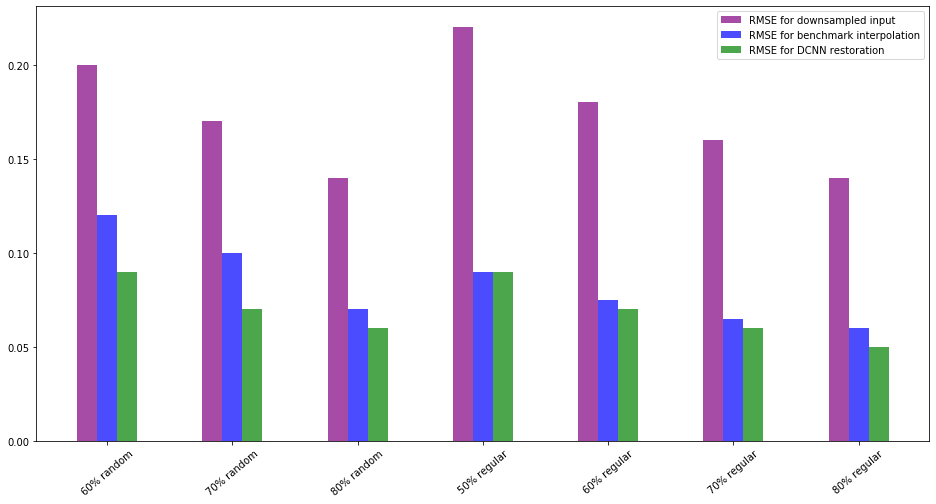

In [188]:
#print(len(drmse[2]))
#a1 = sum([v[0] for v in drmse[0.6]])/len(drmse[2])
#print(a1)

#for i in [0.6, 0.7, 0.8, 2, 3, 4, 5]:
#    a1 = [v[0] for v in drmse[i] if v[0] > 0]
#    print(i , sum(a1) / len(a1))

#for i in [0.6, 0.7, 0.8, 2, 3, 4, 5]:
#    a1 = [v[1] for v in drmse[i][-6:]]
#    print(i , sum(a1) / len(a1))
    
#for i in [0.6, 0.7, 0.8, 2, 3, 4, 5]:
#    a1 = [v[2] for v in drmse[i] if v[2] > 0]
#    print(i , sum(a1) / len(a1))

err0 = [ 0.20, 0.17, 0.14, 0.22, 0.18, 0.16, 0.14]
err1 = [ 0.09, 0.07, 0.06, 0.09, 0.07, 0.06, 0.05]
err2 = [ 0.12, 0.10, 0.07, 0.09, 0.075,0.065, 0.06]

binned_err = []
err_cat =["60% random","70% random","80% random","50% regular","60% regular","70% regular","80% regular"]
binned_err.append(err0) 
binned_err.append(err2) 
binned_err.append(err1)
    
binned_err = np.array(binned_err)
print(binned_err.shape)
x_pos = np.array([i+1 for i in range(binned_err.shape[1])])
bar_w = 0.16
colors = ["purple", "blue", "green"]
labels = ["RMSE for downsampled input", "RMSE for benchmark interpolation", "RMSE for DCNN restoration"]
fig, ax = plt.subplots(figsize = (16,8))
for i, e in enumerate(binned_err):
    bar_pos = x_pos - 3*bar_w/2 + (i+0.5)* bar_w
    plt.bar(bar_pos, e, bar_w, align ="center", linewidth = 1, color=colors[i], alpha=0.7, label =labels[i])

plt.xticks(x_pos, err_cat, rotation=40)
plt.legend()

fig.savefig('../../report/hist_metrics.png', bbox_inches='tight')


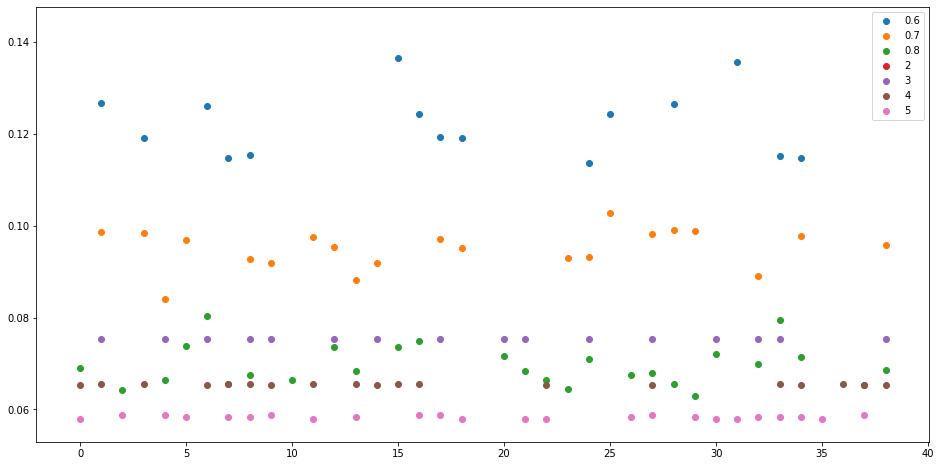

In [107]:
fig, ax = plt.subplots(figsize = (16,8))
for key, value in drmse.items():
    v1 = [v[0] for v in value] # input
    v2 = [v[1] for v in value]  #predicted
    v3 = [v[2] for v in value]  #interrpolated
    
#    ax.scatter([i for i in range(len(v1))],v1, label = str(key))
#    ax.scatter([i for i in range(len(v2))],v2, label = str(key))
    ax.scatter([i for i in range(len(v3))],v3, label = str(key))
    
ax.legend(loc = "upper right")

plt.show()

## Randomly select 16 images and display them tightly

In [15]:
n = 16
file_list = glob.glob('data/landmass1/*.mat')
fs_list = glob.glob('data/landmass1/s*.mat')
fh_list = glob.glob('data/landmass1/h*.mat')
fc_list = glob.glob('data/landmass1/c*.mat')
ff_list = glob.glob('data/landmass1/f*.mat')
fa_list = random.sample(fs_list,4)
fa_list.extend(random.sample(fh_list,4))
fa_list.extend(random.sample(fc_list,4))
fa_list.extend(random.sample(ff_list,4))
file_to_use = random.sample(fa_list,n)


/home/irina/anaconda3/envs/tfpytorch/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


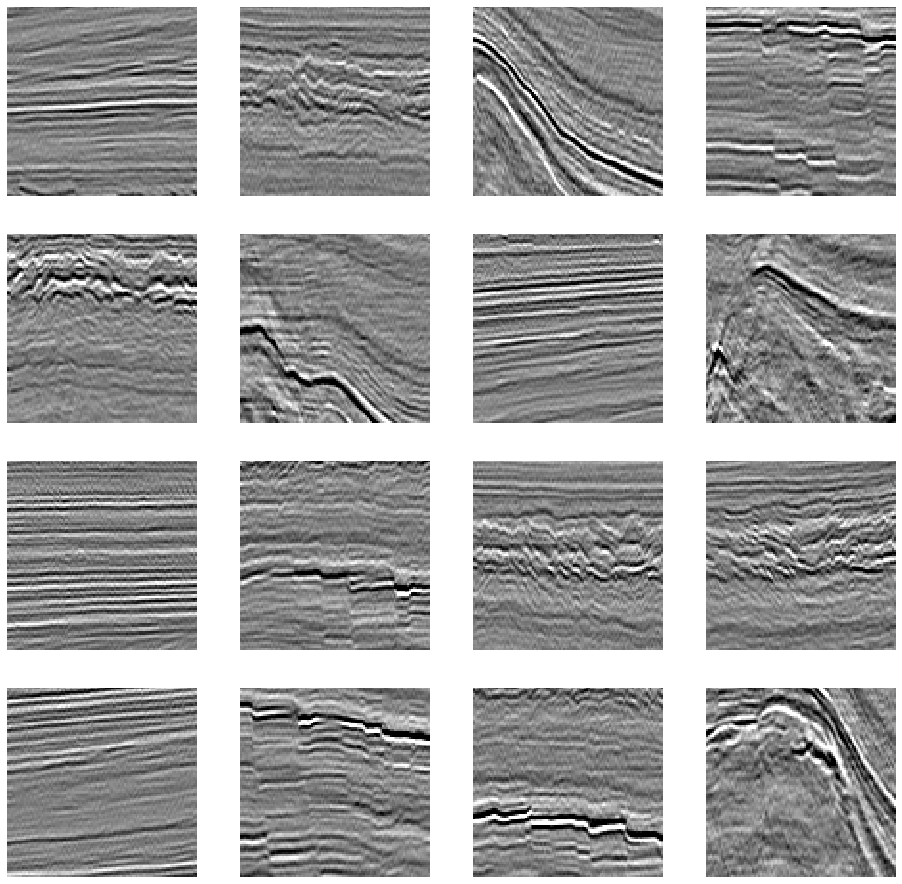

In [16]:
files_to_use = ["data/landmass1/horizon_6243.mat" ,"data/landmass1/chaotic_4720.mat" ,
                "data/landmass1/saltdome_1627.mat","data/landmass1/fault_0228.mat"   ,
                "data/landmass1/chaotic_1418.mat" ,"data/landmass1/saltdome_0409.mat",
                "data/landmass1/horizon_8606.mat" ,"data/landmass1/saltdome_0333.mat",
                "data/landmass1/horizon_8503.mat" ,"data/landmass1/fault_0094.mat"   ,
                "data/landmass1/chaotic_4153.mat" ,"data/landmass1/chaotic_3822.mat" ,
                "data/landmass1/horizon_2666.mat" ,"data/landmass1/fault_0032.mat"   ,
                "data/landmass1/fault_0666.mat"   ,"data/landmass1/saltdome_0937.mat"]

fig = plt.figure(figsize = (16,16))
x1 = [] 
for i in range(n):
    #print(files_to_use[i])
    mat = loadmat(files_to_use[i])
    x = mat["img"][:, :] 
    x1.append(x)
    fig.add_subplot(4,4,i+1).imshow(x, vmin=-1, vmax=1, cmap="gray")
    fig.add_subplot(4,4,i+1).axis('off')
plt.show()
#fig.savefig('report/fig_analysis1.png', bbox_inches='tight')

## Apply downsampling as for training

/home/irina/anaconda3/envs/tfpytorch/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


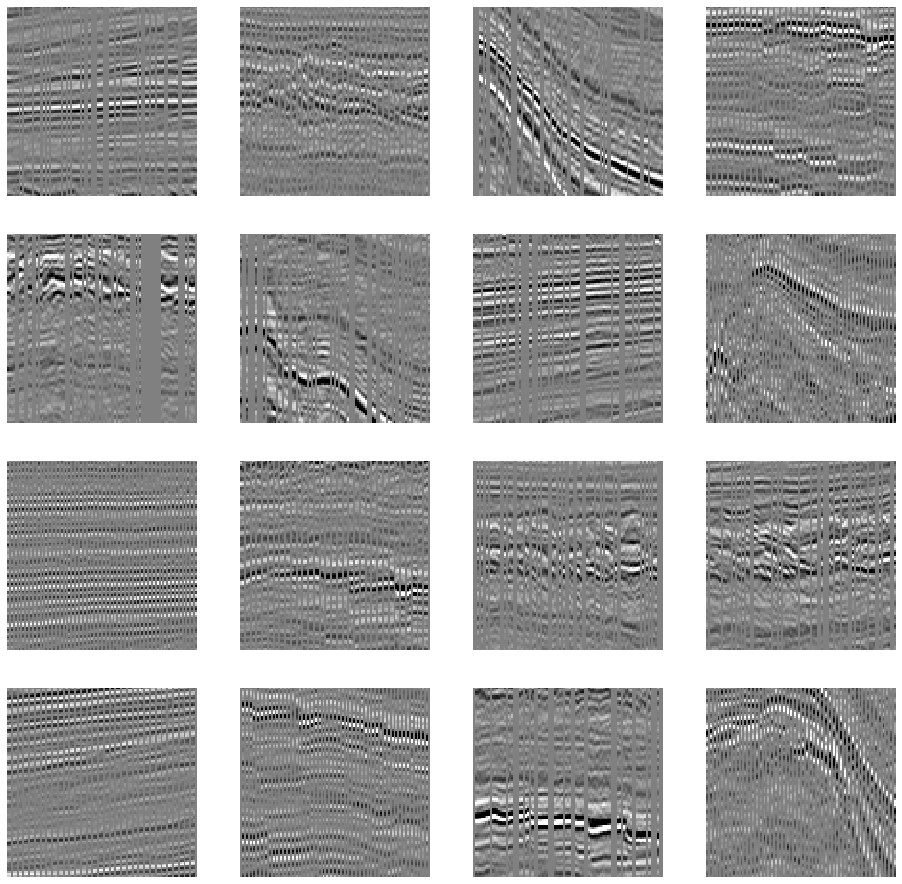

In [17]:
fig = plt.figure(figsize = (16,16))
x2 = []
mm = []
for i in range(n):
    r = random.sample([0.6, 0.7, 2,3],1)[0]
    x = x1[i] 
    m = mask(x, r)
    x = x * m
    x2.append(x)
    mm.append(m)
    fig.add_subplot(4,4,i+1).imshow(x, vmin=-1, vmax=1, cmap="gray")
    fig.add_subplot(4,4,i+1).axis('off')
plt.show()
#fig.savefig('report/report/fig_analysis2.png', bbox_inches='tight')

## Generate benchmark

/home/irina/anaconda3/envs/tfpytorch/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


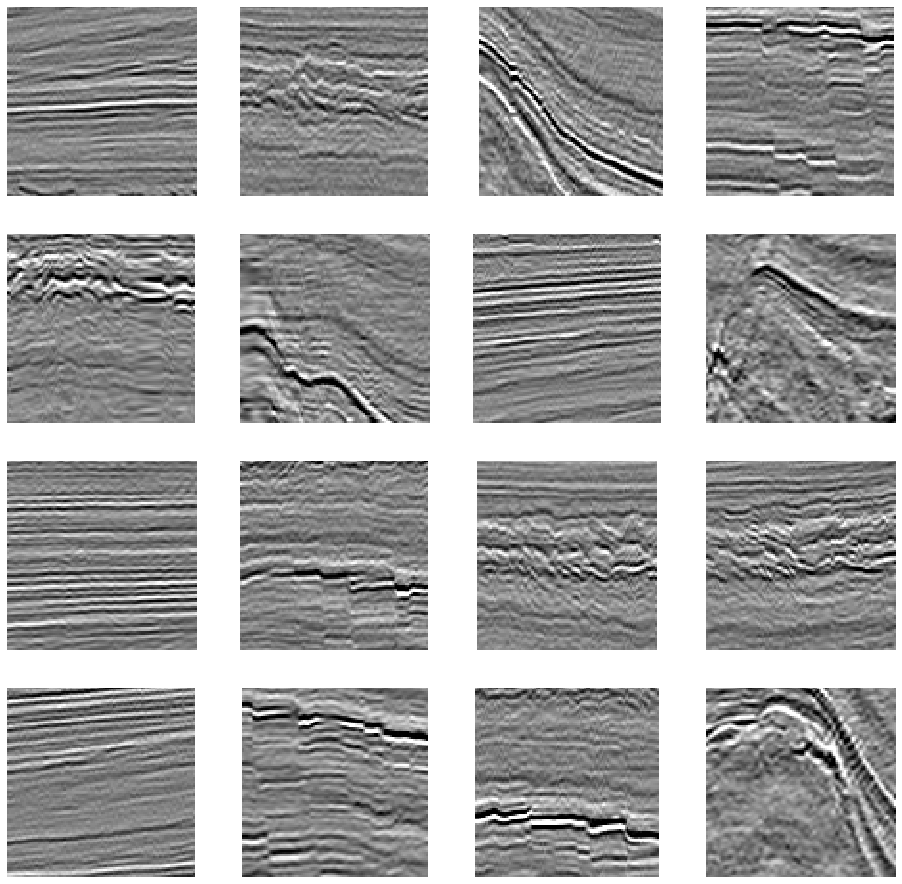

In [19]:
x3 =[]
fig = plt.figure(figsize = (16,16))
for i in range(n):
    r = random.sample([0.6, 0.7, 2,3],1)[0]
    x = gridInterpolation(x2[i], mm[i])
    x3.append(x)
    fig.add_subplot(4,4,i+1).imshow(x, vmin=-1, vmax=1, cmap="gray")
    fig.add_subplot(4,4,i+1).axis('off')
plt.show()
#fig.savefig('report/report/fig_analysis3.png', bbox_inches='tight')


## Generate two high res images for a figure about DCNN

/home/irina/anaconda3/envs/tfpytorch/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


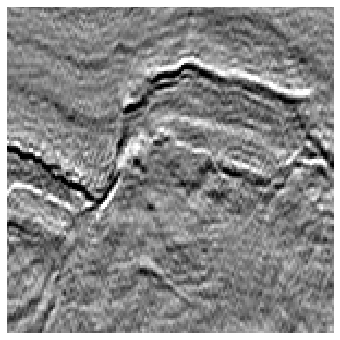

/home/irina/anaconda3/envs/tfpytorch/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


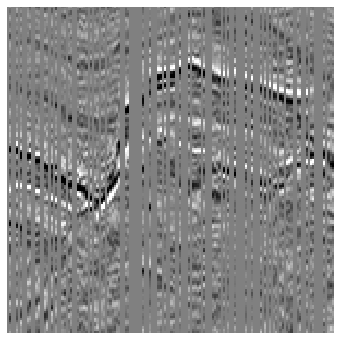

In [20]:
matfile= "data/validation/saltdome_0167.mat"
mat = loadmat(matfile)
x = mat["img"][:, :150] 
m = mask(x,0.5)
fig = plt.figure(figsize = (6,6))
fig.add_subplot(1,1,1).imshow(x, vmin=-1, vmax=1, cmap="gray")
fig.add_subplot(1,1,1).axis('off')
plt.show()
#fig.savefig('report/report/fig_analysis6.png', bbox_inches='tight')

fig = plt.figure(figsize = (6,6))
fig.add_subplot(1,1,1).imshow(x*m, vmin=-1, vmax=1, cmap="gray")
fig.add_subplot(1,1,1).axis('off')
plt.show()
#fig.savefig('report/report/fig_analysis5.png', bbox_inches='tight')



## Generate infered images for validation

In [28]:
trained_model = "saved_models/model_040.pth"
f1 = "data/landmass1/saltdome_1261.mat"
matfile= "data/validation/saltdome_0167.mat"
mat = loadmat(matfile)
x0 = mat["img"][:, :] 

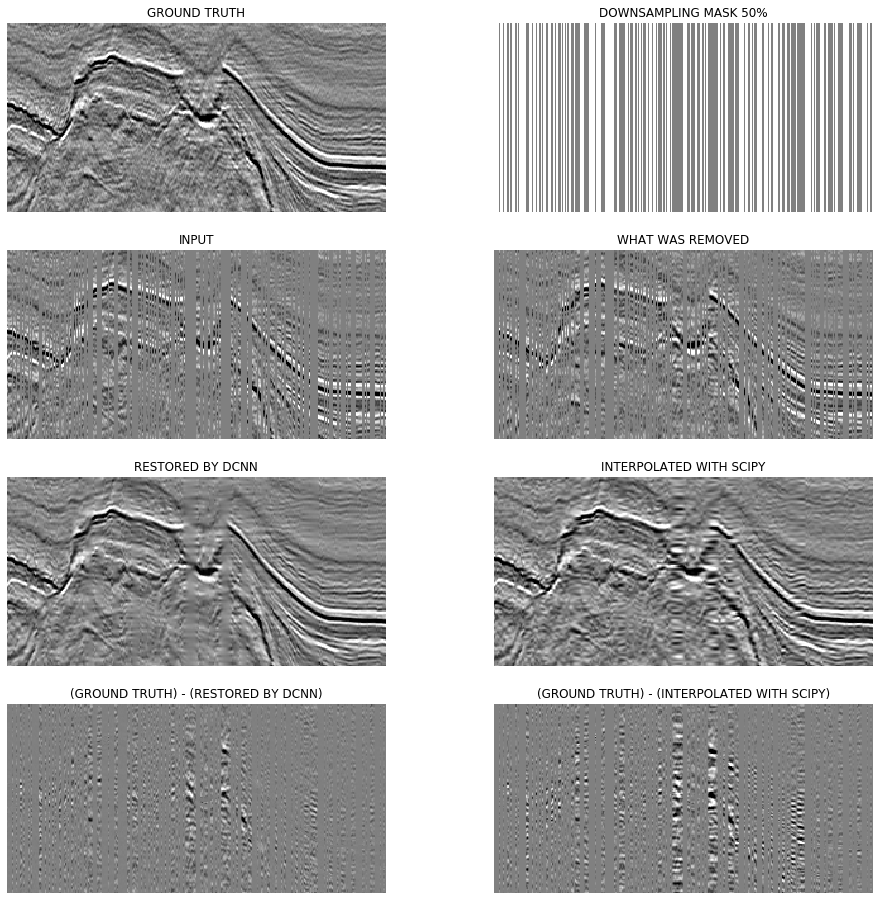

In [29]:
m = mask(x0, 0.5)
x1 = x0 * m
x2 = gridInterpolation(x1, m)
x3 = predict(x1, trained_model)
fig = plt.figure(figsize = (16,16))
plt.subplot(421)
plt.imshow(x0, vmin=-1, vmax=1, cmap="gray")
plt.title('GROUND TRUTH')
plt.axis('off')

plt.subplot(422)
plt.imshow(m, vmin=-1, vmax=1, cmap="gray")
plt.title("DOWNSAMPLING MASK 50%")
plt.axis('off')

plt.subplot(423)   
plt.imshow(x1, vmin=-1, vmax=1, cmap="gray")
plt.title('INPUT')
plt.axis("off")

plt.subplot(424)
plt.imshow(x0 - x1, vmin=-1, vmax=1, cmap="gray")
plt.title("WHAT WAS REMOVED")
plt.axis('off')

plt.subplot(425)   
plt.imshow(x3, vmin=-1, vmax=1, cmap="gray")
plt.title('RESTORED BY DCNN')
plt.axis("off")

plt.subplot(426)
plt.imshow(x2, vmin=-1, vmax=1, cmap="gray")
plt.title("INTERPOLATED WITH SCIPY")
plt.axis("off")

plt.subplot(427)
plt.imshow(x0 - x3, vmin=-1, vmax=1, cmap ="gray")
plt.title("(GROUND TRUTH) - (RESTORED BY DCNN)")
plt.axis("off")

plt.subplot(428)
plt.imshow(x0 - x2, vmin=-1, vmax=1, cmap="gray")
plt.title("(GROUND TRUTH) - (INTERPOLATED WITH SCIPY)")
plt.axis('off')

plt.show()
#fig.savefig('report/report/fig_result7.png', bbox_inches='tight')

In [1]:
n = 64
file_list = glob.glob('data/landmass1/*.mat')
fs_list = glob.glob('data/landmass1/s*.mat')
fh_list = glob.glob('data/landmass1/h*.mat')
fc_list = glob.glob('data/landmass1/c*.mat')
ff_list = glob.glob('data/landmass1/f*.mat')
fa_list = random.sample(fs_list,16)
fa_list.extend(random.sample(fh_list,16))
fa_list.extend(random.sample(fc_list,16))
fa_list.extend(random.sample(ff_list,16))
#for f in fa_list:
    # print(f)
    #!cp $f submit/project/data/landmass1/.

NameError: name 'glob' is not defined